# Contour-based filtering

In [1]:
import numpy as np
from numpy import pi as pi
import seaborn as sns
import matplotlib.pyplot as plt
from src.utilities.utilstf import *
from mcsm_benchmarks.SignalBank import SignalBank
from mcsm_benchmarks.Benchmark import Benchmark
from src.methods.method_contour_filtering import NewMethod
from mcsm_benchmarks.Benchmark import corr_comps

In [2]:
np.random.seed(0) 
# signal parameters
SNRin = -5
N = 2**10
# Nsub=N//2
sbank = SignalBank(N=N, return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax
s = sbank.signal_mc_multi_linear()
# s = sbank.signal_mc_crossing_chirps()
# s = sbank.signal_mc_synthetic_mixture_5()

noise = np.random.randn(N,)
signal = Benchmark.sigmerge(s,noise,SNRin)

In [3]:
Nfft = 2*N
g,_ = get_round_window(Nfft)
S, F = get_spectrogram(signal, window = g)
F = F[0:N+1]

methodml = NewMethod()
funa = methodml.method
# signal_r = contour_filtering(s, NumC, Ks, a)
signal_output = funa(signal,)

S_output, F_output = get_spectrogram(signal_output, window = g)
F_output = F_output[0:N+1]
print(10*np.log10((np.sum(s[tmin:tmax]**2))/(np.sum((s[tmin:tmax]-signal_output[tmin:tmax])**2))))

-0.6431195314421051


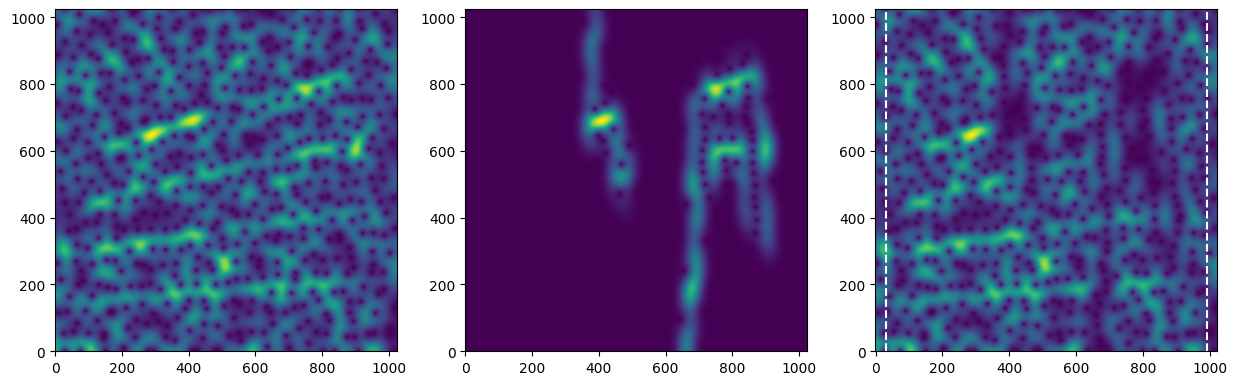

In [4]:
fig, ax = plt.subplots(1,3,figsize = (15,5))
ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)
ax[2].imshow(abs(F_output-F), origin='lower')#, cmap=cmocean.cm.deep)
ax[2].plot([tmin, tmin], [0, Nfft//2],'w--')
ax[2].plot([tmax, tmax], [0, Nfft//2],'w--')
plt.show()


In [5]:
print(corr_comps(s,signal))
print(corr_comps(s,signal_output))

0.5109265485707222
0.30938940081133925
